In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from datetime import time
from datetime import datetime
sns.set_style("whitegrid")
appdata_df = pd.read_csv("C:/Users/umprasad/Desktop/EDA/application_data.csv")
#dropping columns with more than 50% missing values
thresh = len(appdata_df) * .5
appdata_df.dropna(thresh = thresh, axis = 1, inplace = True)
appdata_df.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
#dropping rows with duplicate values
appdata_df = appdata_df.drop_duplicates()
appdata_df.CODE_GENDER.unique() 
# Correcting the data imbalance in Gender Column by removing the rows having 'XNA' 
appdata_df = appdata_df[appdata_df['CODE_GENDER'] != 'XNA']
appdata_df.CODE_GENDER.unique()

array(['M', 'F'], dtype=object)

# Univariate analysis:

In [41]:
analysis1_df = appdata_df[['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']].copy()
analysis1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307507 entries, 0 to 307510
Data columns (total 6 columns):
SK_ID_CURR            307507 non-null int64
TARGET                307507 non-null int64
NAME_CONTRACT_TYPE    307507 non-null object
CODE_GENDER           307507 non-null object
FLAG_OWN_CAR          307507 non-null object
FLAG_OWN_REALTY       307507 non-null object
dtypes: int64(2), object(4)
memory usage: 16.4+ MB


In [42]:
analysis1_df['CODE_GENDER'] = analysis1_df['CODE_GENDER'].map({'M':1,'F':0})
analysis1_df['NAME_CONTRACT_TYPE'] = analysis1_df['NAME_CONTRACT_TYPE'].map({'Cash loans':1,'Revolving loans':0})
analysis1_df['FLAG_OWN_CAR'] = analysis1_df['FLAG_OWN_CAR'].map({'Y':1,'N':0})
analysis1_df['FLAG_OWN_REALTY'] = analysis1_df['FLAG_OWN_REALTY'].map({'Y':1,'N':0})

C:\Users\umprasad\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


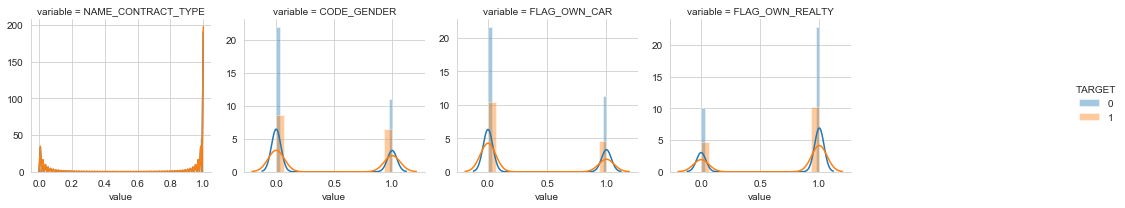

In [43]:
output = 'TARGET'
cols = [ i for i in analysis1_df.columns if analysis1_df.dtypes[i] != "object"]
cols.remove( "SK_ID_CURR")
cols.remove( output )
f = pd.melt( analysis1_df, id_vars=output, value_vars=cols)
g = sns.FacetGrid( f, hue=output, col="variable", col_wrap=5, sharex=False, sharey=False )
g = g.map( sns.distplot, "value", kde=True).add_legend()

# Observations:

In [97]:
analysis2_df = appdata_df[['SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'NAME_HOUSING_TYPE', 'NAME_CONTRACT_TYPE', 
                          'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE']].copy()
analysis2_df.head(2)

,SK_ID_CURR,TARGET,CODE_GENDER,NAME_HOUSING_TYPE,NAME_CONTRACT_TYPE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,OCCUPATION_TYPE
0,100002,1,M,House / apartment,Cash loans,Working,Secondary / secondary special,Single / not married,Laborers
1,100003,0,F,House / apartment,Cash loans,State servant,Higher education,Married,Core staff


In [98]:
analysis2_df['CODE_GENDER'] = analysis2_df['CODE_GENDER'].map({'M':1,'F':2})
analysis2_df.CODE_GENDER.unique() 

array([1, 2], dtype=int64)

In [99]:
analysis2_df.NAME_CONTRACT_TYPE.unique() 
analysis2_df['NAME_CONTRACT_TYPE'] = analysis2_df['NAME_CONTRACT_TYPE'].map({'Cash loans':1,'Revolving loans':2})

In [100]:
analysis2_df.NAME_INCOME_TYPE.unique() 
analysis2_df['NAME_INCOME_TYPE'] = analysis2_df['NAME_INCOME_TYPE'].map({'Unemployed':0, 'Working':1, 'State servant':2, 'Commercial associate':3, 'Pensioner':4, 'Student':5, 'Businessman':6, 'Maternity leave':7,})

In [101]:
analysis2_df.NAME_EDUCATION_TYPE.unique()
analysis2_df['NAME_EDUCATION_TYPE'] = analysis2_df['NAME_EDUCATION_TYPE'].map({'Lower secondary':0, 'Secondary / secondary special':1, 
                                            'Incomplete higher':2, 'Higher education':3, 
                                            'Academic degree':4})

In [102]:
analysis2_df.NAME_FAMILY_STATUS.unique() 
analysis2_df['NAME_FAMILY_STATUS'] = analysis2_df['NAME_FAMILY_STATUS'].map({'Single / not married':0, 'Civil marriage':1, 
                                            'Married':1, 'Widow':2, 
                                            'Separated':2, 'Unknown':3})

In [103]:
analysis2_df.NAME_HOUSING_TYPE.unique() 
analysis2_df['NAME_HOUSING_TYPE'] = analysis2_df['NAME_HOUSING_TYPE'].map({'House / apartment':0, 'Rented apartment':1, 
                                            'Municipal apartment':2, 'Office apartment':2, 
                                            'Co-op apartment':2, 'With parents':3})

In [104]:
analysis2_df.OCCUPATION_TYPE.unique() 
analysis2_df['OCCUPATION_TYPE'] = analysis2_df['OCCUPATION_TYPE'].map({'Laborers':0, 
'Drivers':0,
'Cleaning staff':0, 
'Cooking staff':0,
'Security staff':0,
'Waiters/barmen staff':0,
'Low-skill Laborers':0,
'Realty agents':1, 
'Core staff':1, 
'Accountants':1,
'IT staff':1,
'HR staff':1,
'High skill tech staff':1, 
'Sales staff':1, 
'Private service staff':1, 
'Medicine staff':1,
'Managers':2,
'Secretaries':2, })

In [105]:
analysis2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307507 entries, 0 to 307510
Data columns (total 9 columns):
SK_ID_CURR             307507 non-null int64
TARGET                 307507 non-null int64
CODE_GENDER            307507 non-null int64
NAME_HOUSING_TYPE      307507 non-null int64
NAME_CONTRACT_TYPE     307507 non-null int64
NAME_INCOME_TYPE       307507 non-null int64
NAME_EDUCATION_TYPE    307507 non-null int64
NAME_FAMILY_STATUS     307507 non-null int64
OCCUPATION_TYPE        211118 non-null float64
dtypes: float64(1), int64(8)
memory usage: 23.5 MB


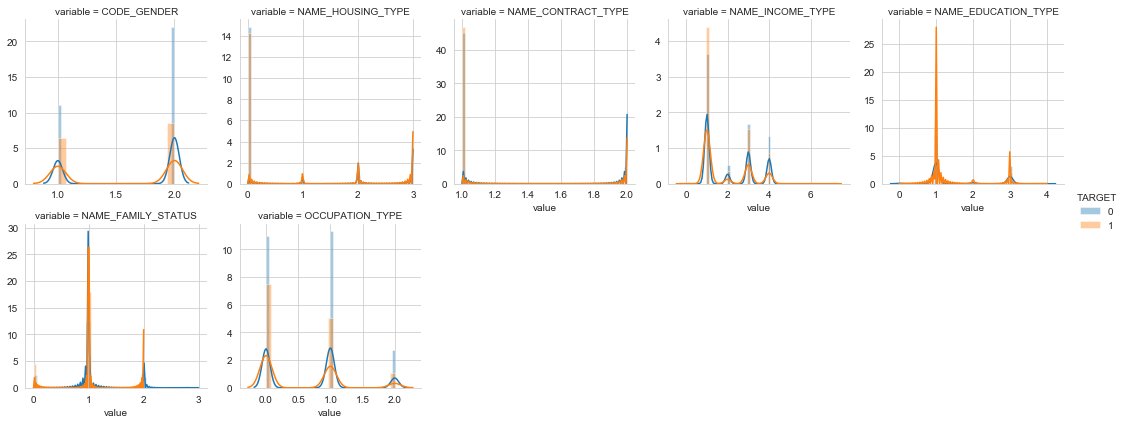

In [106]:
output = 'TARGET'
cols = [ j for j in analysis2_df.columns if analysis2_df.dtypes[j] != "object"]
cols.remove( "SK_ID_CURR")
cols.remove( output )
f = pd.melt( analysis2_df, id_vars=output, value_vars=cols)
g = sns.FacetGrid( f, hue=output, col="variable", col_wrap=5, sharex=False, sharey=False )
g = g.map( sns.distplot, "value", kde=True).add_legend()

# Observations:

# Bivariate Analysis:

In [128]:
bivar_df = appdata_df.copy()

appdata_df0 = bivar_df[appdata_df.TARGET == 0]
appdata_df1 = bivar_df[appdata_df.TARGET == 1]
#Simplyfying the Target column for analysis
appdata_df0['TARGET'] = appdata_df0['TARGET'].map({0:1})
appdata_df0.head(2)

C:\Users\umprasad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,1,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


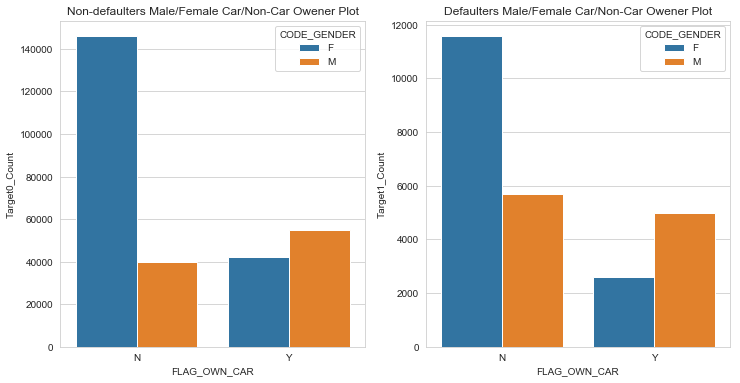

In [153]:
analysis1_df0 = appdata_df0.groupby(['TARGET', 'CODE_GENDER','FLAG_OWN_CAR']).size().reset_index(name='Target0_Count')
analysis1_df1 = appdata_df1.groupby(['TARGET', 'CODE_GENDER','FLAG_OWN_CAR']).size().reset_index(name='Target1_Count')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot( x ='FLAG_OWN_CAR',y='Target0_Count', hue="CODE_GENDER", data=analysis1_df0)
plt.title("Non-defaulters Male/Female Car/Non-Car Owener Plot")
plt.subplot(1, 2, 2)
sns.barplot( x ='FLAG_OWN_CAR',y='Target1_Count', hue="CODE_GENDER", data=analysis1_df1)
plt.title("Defaulters Male/Female Car/Non-Car Owener Plot")
plt.show()

# Observations:

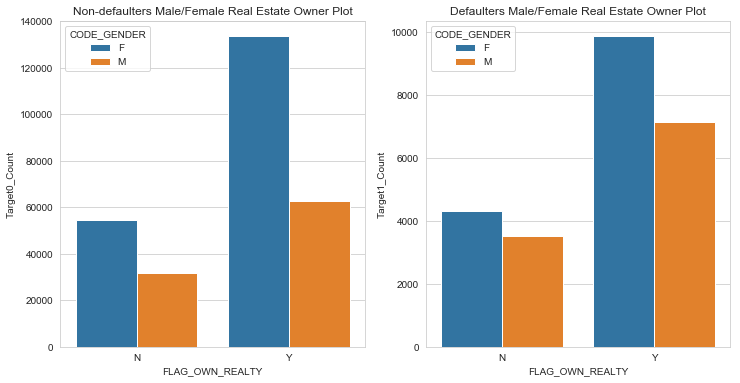

In [155]:
analysis2_df0 = appdata_df0.groupby(['TARGET', 'CODE_GENDER','FLAG_OWN_REALTY']).size().reset_index(name='Target0_Count')
analysis2_df1 = appdata_df1.groupby(['TARGET', 'CODE_GENDER','FLAG_OWN_REALTY']).size().reset_index(name='Target1_Count')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot( x ='FLAG_OWN_REALTY',y='Target0_Count', hue="CODE_GENDER", data=analysis2_df0)
plt.title("Non-defaulters Male/Female Real Estate Owner Plot")
plt.subplot(1, 2, 2)
sns.barplot( x ='FLAG_OWN_REALTY',y='Target1_Count', hue="CODE_GENDER", data=analysis2_df1)
plt.title("Defaulters Male/Female Real Estate Owner Plot")
plt.show()

# Observations:

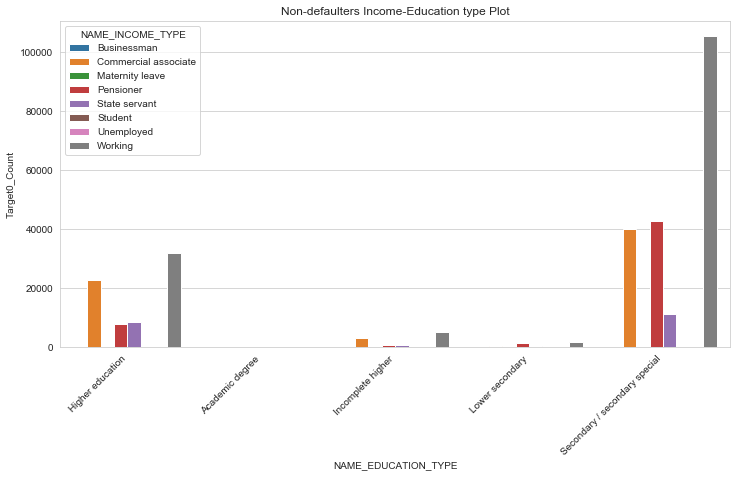

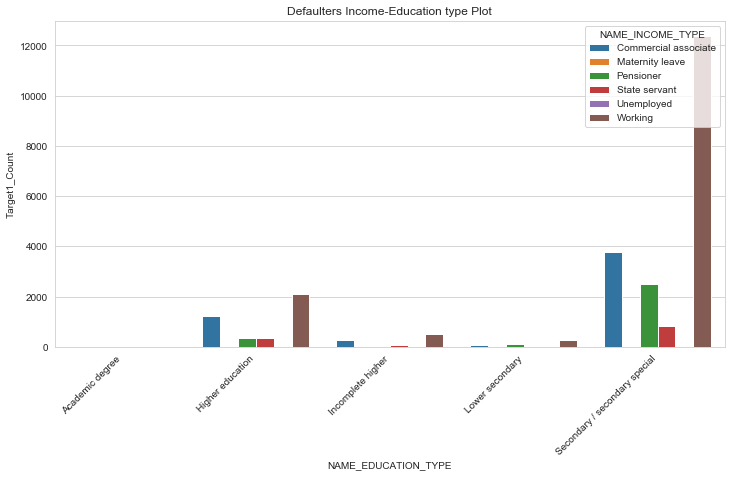

In [166]:
analysis3_df0 = appdata_df0.groupby(['TARGET', 'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE']).size().reset_index(name='Target0_Count')
analysis3_df1 = appdata_df1.groupby(['TARGET', 'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE']).size().reset_index(name='Target1_Count')

plt.figure(figsize=(12, 6))
plot1=sns.barplot( x ='NAME_EDUCATION_TYPE',y='Target0_Count', hue="NAME_INCOME_TYPE", data=analysis3_df0)
plt.title("Non-defaulters Income-Education type Plot")
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

plt.figure(figsize=(12, 6))
plot2=sns.barplot( x ='NAME_EDUCATION_TYPE',y='Target1_Count', hue="NAME_INCOME_TYPE", data=analysis3_df1)
plt.title("Defaulters Income-Education type Plot")
plot2.set_xticklabels(plot2.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [211]:
pd.pivot_table(appdata_df0,'TARGET',['CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE'],aggfunc=np.sum)

TARGET
CODE_GENDER NAME_INCOME_TYPE     NAME_EDUCATION_TYPE                  
F           Businessman          Higher education                    3
            Commercial associate Academic degree                    25
                                 Higher education                14526
                                 Incomplete higher                1896
                                 Lower secondary                   201
                                 Secondary / secondary special   24903
            Maternity leave      Higher education                    2
            Pensioner            Academic degree                    22
                                 Higher education                 6020
                                 Incomplete higher                 381
                                 Lower secondary                  1139
                                 Secondary / secondary special   35456
            State servant        Academic degree                    16
                                 Higher education                 6245
                                 Incomplete higher                 456
                                 Lower secondary                    63
                                 Secondary / secondary special    8229
            Student              Higher education                    2
                                 Secondary / secondary special       5
            Unemployed           Higher education                    4
                                 Incomplete higher                   1
                                 Secondary / secondary special       6
            Working              Academic degree                    34
                                 Higher education                21049
                                 Incomplete higher                3045
                                 Lower secondary                   694
                                 Secondary / secondary special   63855
M           Businessman          Higher education                    7
            Commercial associate Academic degree                    17
                                 Higher education                 8256
                                 Incomplete higher                1224
                                 Lower secondary                   203
                                 Secondary / secondary special   15005
            Maternity leave      Higher education                    1
            Pensioner            Academic degree                     4
                                 Higher education                 1828
                                 Incomplete higher                 114
                                 Lower secondary                   288
                                 Secondary / secondary special    7128
            State servant        Academic degree                     7
                                 Higher education                 2274
                                 Incomplete higher                 262
                                 Lower secondary                    31
                                 Secondary / secondary special    2871
            Student              Higher education                    4
                                 Incomplete higher                   1
                                 Secondary / secondary special       6
            Unemployed           Higher education                    2
                                 Incomplete higher                   1
            Working              Academic degree                    36
                                 Higher education                10630
                                 Incomplete higher                2023
                                 Lower secondary                   780
                                 Secondary / secondary special   41401

In [212]:
pd.pivot_table(appdata_df1,'TARGET',['CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE'],aggfunc=np.sum)

TARGET
CODE_GENDER NAME_INCOME_TYPE     NAME_EDUCATION_TYPE                  
F           Commercial associate Academic degree                     1
                                 Higher education                  723
                                 Incomplete higher                 155
                                 Lower secondary                    28
                                 Secondary / secondary special    2061
            Maternity leave      Secondary / secondary special       2
            Pensioner            Higher education                  229
                                 Incomplete higher                  16
                                 Lower secondary                    73
                                 Secondary / secondary special    1925
            State servant        Higher education                  238
                                 Incomplete higher                  34
                                 Lower secondary                     8
                                 Secondary / secondary special     567
            Unemployed           Incomplete higher                   1
                                 Secondary / secondary special       5
            Working              Academic degree                     2
                                 Higher education                 1248
                                 Incomplete higher                 298
                                 Lower secondary                   105
                                 Secondary / secondary special    6451
M           Commercial associate Higher education                  520
                                 Incomplete higher                 124
                                 Lower secondary                    28
                                 Secondary / secondary special    1720
            Pensioner            Higher education                  111
                                 Incomplete higher                   7
                                 Lower secondary                    29
                                 Secondary / secondary special     592
            State servant        Higher education                  106
                                 Incomplete higher                  18
                                 Secondary / secondary special     278
            Unemployed           Secondary / secondary special       2
            Working              Higher education                  834
                                 Incomplete higher                 219
                                 Lower secondary                   146
                                 Secondary / secondary special    5921

# Observations:

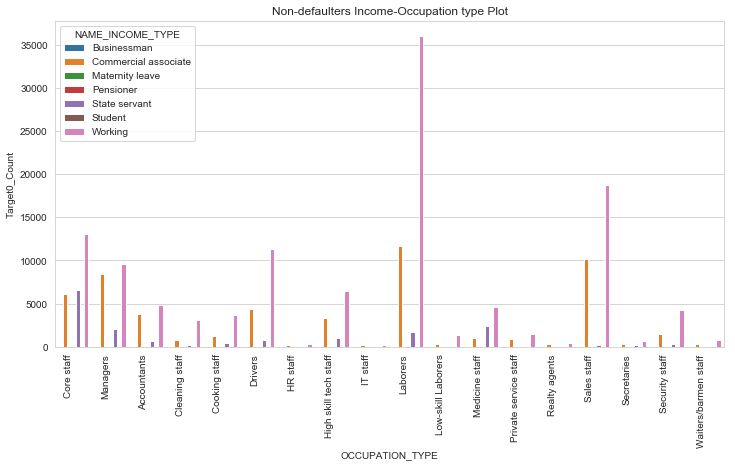

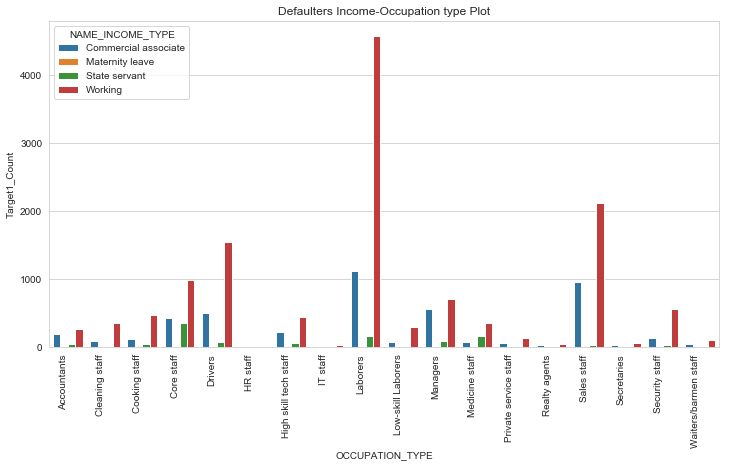

In [168]:
analysis4_df0 = appdata_df0.groupby(['TARGET', 'NAME_INCOME_TYPE','OCCUPATION_TYPE']).size().reset_index(name='Target0_Count')
analysis4_df1 = appdata_df1.groupby(['TARGET', 'NAME_INCOME_TYPE','OCCUPATION_TYPE']).size().reset_index(name='Target1_Count')

plt.figure(figsize=(12, 6))
plot1=sns.barplot( x ='OCCUPATION_TYPE',y='Target0_Count', hue="NAME_INCOME_TYPE", data=analysis4_df0)
plt.title("Non-defaulters Income-Occupation type Plot")
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

plt.figure(figsize=(12, 6))
plot2=sns.barplot( x ='OCCUPATION_TYPE',y='Target1_Count', hue="NAME_INCOME_TYPE", data=analysis4_df1)
plt.title("Defaulters Income-Occupation type Plot")
plot2.set_xticklabels(plot2.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

In [217]:
pd.pivot_table(appdata_df0,'TARGET',['CODE_GENDER','NAME_INCOME_TYPE','OCCUPATION_TYPE'],aggfunc=np.sum)

TARGET
CODE_GENDER NAME_INCOME_TYPE     OCCUPATION_TYPE              
F           Businessman          Managers                    1
            Commercial associate Accountants              3672
                                 Cleaning staff            758
                                 Cooking staff            1029
                                 Core staff               4675
                                 Drivers                   213
                                 HR staff                  187
                                 High skill tech staff    1999
                                 IT staff                   42
                                 Laborers                 5129
                                 Low-skill Laborers         45
                                 Managers                 4188
                                 Medicine staff            941
                                 Private service staff     903
                                 Realty agents             284
                                 Sales staff              8656
                                 Secretaries               302
                                 Security staff            335
                                 Waiters/barmen staff      273
            Maternity leave      Accountants                 1
                                 Core staff                  1
            Pensioner            Cleaning staff              2
                                 Laborers                    1
                                 Medicine staff              1
                                 Sales staff                 1
            State servant        Accountants               684
                                 Cleaning staff            227
                                 Cooking staff             395
                                 Core staff               5075
                                 Drivers                    96
...                                                        ...
M           State servant        Low-skill Laborers         19
                                 Managers                  732
                                 Medicine staff             66
                                 Private service staff       4
                                 Realty agents               1
                                 Sales staff                14
                                 Secretaries                10
                                 Security staff            173
                                 Waiters/barmen staff        1
            Student              Drivers                     1
                                 Laborers                    4
                                 Low-skill Laborers          2
            Working              Accountants               139
                                 Cleaning staff            228
                                 Cooking staff             318
                                 Core staff               2378
                                 Drivers                 10791
                                 HR staff                   15
                                 High skill tech staff    2183
                                 IT staff                  165
                                 Laborers                20935
                                 Low-skill Laborers       1180
                                 Managers                 4174
                                 Medicine staff            119
                                 Private service staff      64
                                 Realty agents              28
                                 Sales staff              1957
                                 Secretaries                22
                                 Security staff           2894
                                 Waiters/barmen staff       82

[124 rows x 1 columns]

In [218]:
pd.pivot_table(appdata_df1,'TARGET',['CODE_GENDER','NAME_INCOME_TYPE','OCCUPATION_TYPE'],aggfunc=np.sum)

TARGET
CODE_GENDER NAME_INCOME_TYPE     OCCUPATION_TYPE              
F           Commercial associate Accountants               176
                                 Cleaning staff             72
                                 Cooking staff              93
                                 Core staff                293
                                 Drivers                    21
                                 HR staff                   16
                                 High skill tech staff     118
                                 IT staff                    3
                                 Laborers                  406
                                 Low-skill Laborers          6
                                 Managers                  239
                                 Medicine staff             60
                                 Private service staff      45
                                 Realty agents              15
                                 Sales staff               825
                                 Secretaries                21
                                 Security staff             34
                                 Waiters/barmen staff       39
            Maternity leave      Core staff                  1
                                 Laborers                    1
            State servant        Accountants                31
                                 Cleaning staff             16
                                 Cooking staff              42
                                 Core staff                258
                                 Drivers                     3
                                 HR staff                    2
                                 High skill tech staff      36
                                 IT staff                    3
                                 Laborers                   58
                                 Managers                   45
...                                                        ...
M           State servant        Cleaning staff              1
                                 Cooking staff               1
                                 Core staff                 90
                                 Drivers                    65
                                 High skill tech staff      12
                                 IT staff                    4
                                 Laborers                   98
                                 Low-skill Laborers          1
                                 Managers                   38
                                 Medicine staff              6
                                 Sales staff                 2
                                 Security staff             19
            Working              Accountants                 9
                                 Cleaning staff             31
                                 Cooking staff              44
                                 Core staff                226
                                 Drivers                  1488
                                 HR staff                    2
                                 High skill tech staff     129
                                 IT staff                   15
                                 Laborers                 2967
                                 Low-skill Laborers        251
                                 Managers                  339
                                 Medicine staff             14
                                 Private service staff       5
                                 Realty agents               8
                                 Sales staff               233
                                 Secretaries                 6
                                 Security staff            407
                                 Waiters/barmen staff        9

[103 rows x 1 columns]

# Observations:

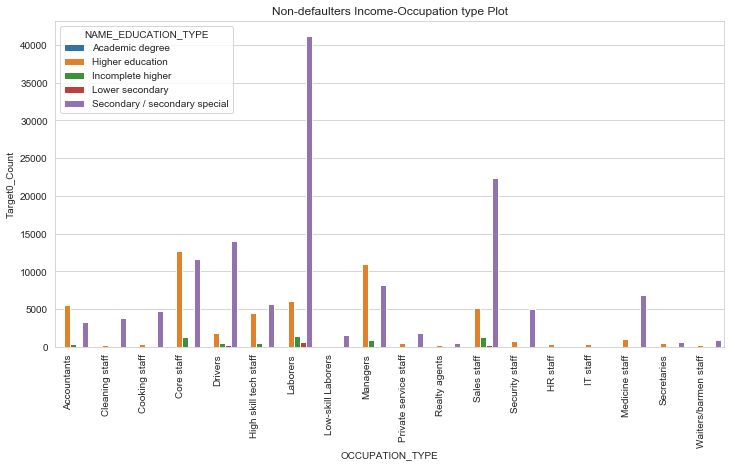

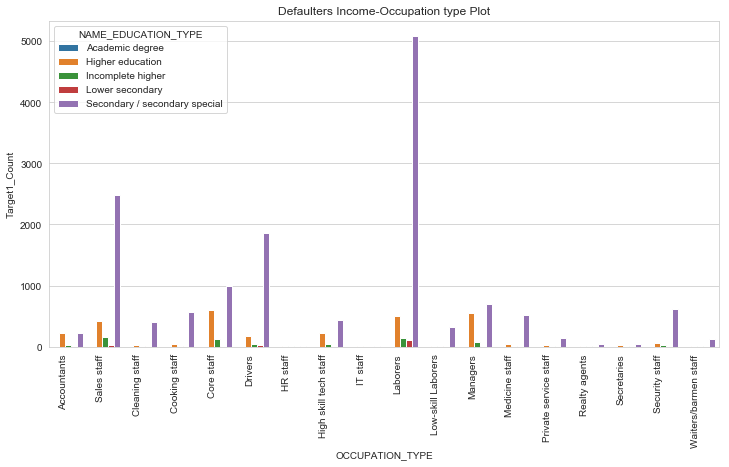

In [169]:
analysis5_df0 = appdata_df0.groupby(['TARGET', 'NAME_EDUCATION_TYPE','OCCUPATION_TYPE']).size().reset_index(name='Target0_Count')
analysis5_df1 = appdata_df1.groupby(['TARGET', 'NAME_EDUCATION_TYPE','OCCUPATION_TYPE']).size().reset_index(name='Target1_Count')

plt.figure(figsize=(12, 6))
plot1=sns.barplot( x ='OCCUPATION_TYPE',y='Target0_Count', hue="NAME_EDUCATION_TYPE", data=analysis5_df0)
plt.title("Non-defaulters Income-Occupation type Plot")
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

plt.figure(figsize=(12, 6))
plot2=sns.barplot( x ='OCCUPATION_TYPE',y='Target1_Count', hue="NAME_EDUCATION_TYPE", data=analysis5_df1)
plt.title("Defaulters Income-Occupation type Plot")
plot2.set_xticklabels(plot2.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

In [219]:
pd.pivot_table(appdata_df0,'TARGET',['CODE_GENDER','NAME_EDUCATION_TYPE','OCCUPATION_TYPE'],aggfunc=np.sum)

TARGET
CODE_GENDER NAME_EDUCATION_TYPE           OCCUPATION_TYPE              
F           Academic degree               Accountants                 7
                                          Cleaning staff              2
                                          Cooking staff               1
                                          Core staff                 16
                                          Drivers                     2
                                          High skill tech staff       1
                                          Laborers                    5
                                          Managers                   16
                                          Private service staff       2
                                          Sales staff                 6
                                          Security staff              2
            Higher education              Accountants              5367
                                          Cleaning staff            210
                                          Cooking staff             320
                                          Core staff              10082
                                          Drivers                   186
                                          HR staff                  317
                                          High skill tech staff    2470
                                          IT staff                  105
                                          Laborers                 2461
                                          Low-skill Laborers          9
                                          Managers                 5755
                                          Medicine staff            917
                                          Private service staff     452
                                          Realty agents             198
                                          Sales staff              4068
                                          Secretaries               429
                                          Security staff            163
                                          Waiters/barmen staff      127
            Incomplete higher             Accountants               408
...                                                                 ...
M           Lower secondary               Cleaning staff              6
                                          Cooking staff               3
                                          Core staff                 17
                                          Drivers                   209
                                          High skill tech staff      10
                                          Laborers                  428
                                          Low-skill Laborers         67
                                          Managers                   39
                                          Medicine staff              1
                                          Sales staff                16
                                          Security staff             63
                                          Waiters/barmen staff        2
            Secondary / secondary special Accountants                48
                                          Cleaning staff            273
                                          Cooking staff             394
                                          Core staff               2356
                                          Drivers                 13333
                                          HR staff                    9
                                          High skill tech staff    1585
                                          IT staff                   84
                                          Laborers                23319
                                          Low-skill Laborers       1310
                                          Managers                 3369
                                 

In [220]:
pd.pivot_table(appdata_df1,'TARGET',['CODE_GENDER','NAME_EDUCATION_TYPE','OCCUPATION_TYPE'],aggfunc=np.sum)

TARGET
CODE_GENDER NAME_EDUCATION_TYPE           OCCUPATION_TYPE              
F           Academic degree               Accountants                 1
                                          Sales staff                 1
            Higher education              Accountants               213
                                          Cleaning staff             21
                                          Cooking staff              33
                                          Core staff                463
                                          Drivers                    11
                                          HR staff                   15
                                          High skill tech staff     124
                                          IT staff                    8
                                          Laborers                  189
                                          Low-skill Laborers          1
                                          Managers                  245
                                          Medicine staff             40
                                          Private service staff      30
                                          Realty agents               7
                                          Sales staff               341
                                          Secretaries                26
                                          Security staff             11
                                          Waiters/barmen staff       14
            Incomplete higher             Accountants                25
                                          Cleaning staff              5
                                          Cooking staff               9
                                          Core staff                 86
                                          Drivers                     5
                                          HR staff                    2
                                          High skill tech staff      30
                                          Laborers                   40
                                          Low-skill Laborers          2
                                          Managers                   28
...                                                                 ...
M           Incomplete higher             Sales staff                27
                                          Security staff             16
                                          Waiters/barmen staff        4
            Lower secondary               Cooking staff               1
                                          Core staff                  2
                                          Drivers                    31
                                          High skill tech staff       2
                                          Laborers                   83
                                          Low-skill Laborers         15
                                          Managers                    2
                                          Sales staff                 1
                                          Security staff             12
            Secondary / secondary special Accountants                 5
                                          Cleaning staff             37
                                          Cooking staff              58
                                          Core staff                254
                                          Drivers                  1792
                                          HR staff                    1
                                          High skill tech staff     127
                                          IT staff                   13
                                          Laborers                 3282
                                          Low-skill Laborers        284
                                          Managers                  332
                                 

# Observations:

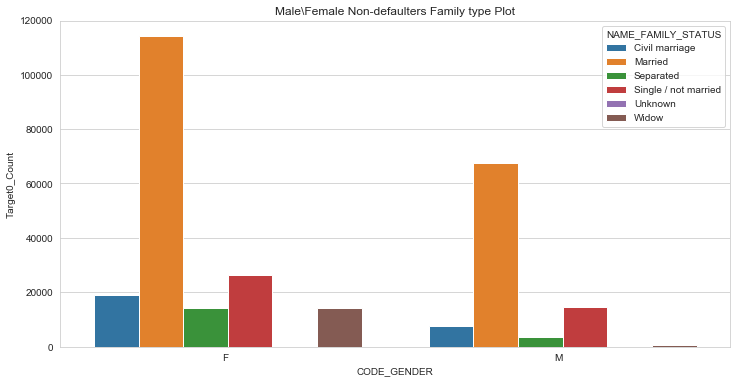

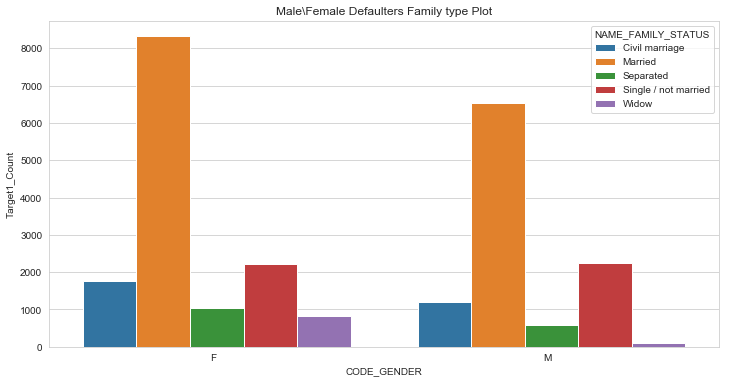

In [171]:
analysis6_df0 = appdata_df0.groupby(['TARGET', 'CODE_GENDER','NAME_FAMILY_STATUS']).size().reset_index(name='Target0_Count')
analysis6_df1 = appdata_df1.groupby(['TARGET', 'CODE_GENDER','NAME_FAMILY_STATUS']).size().reset_index(name='Target1_Count')

plt.figure(figsize=(12, 6))
plot1=sns.barplot( x ='CODE_GENDER',y='Target0_Count', hue="NAME_FAMILY_STATUS", data=analysis6_df0)
plt.title("Male\Female Non-defaulters Family type Plot")
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.show()

plt.figure(figsize=(12, 6))
plot2=sns.barplot( x ='CODE_GENDER',y='Target1_Count', hue="NAME_FAMILY_STATUS", data=analysis6_df1)
plt.title("Male\Female Defaulters Family type Plot")
plot2.set_xticklabels(plot2.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.show()

In [214]:
pd.pivot_table(appdata_df0,'TARGET',['CODE_GENDER','NAME_INCOME_TYPE','NAME_FAMILY_STATUS'],aggfunc=np.sum)

TARGET
CODE_GENDER NAME_INCOME_TYPE     NAME_FAMILY_STATUS          
F           Businessman          Civil marriage             1
                                 Married                    1
                                 Single / not married       1
            Commercial associate Civil marriage          5018
                                 Married                25017
                                 Separated               3252
                                 Single / not married    6822
                                 Unknown                    1
                                 Widow                   1441
            Maternity leave      Married                    2
            Pensioner            Civil marriage          2760
                                 Married                23475
                                 Separated               3194
                                 Single / not married    5099
                                 Widow                   8490
            State servant        Civil marriage          1280
                                 Married                10157
                                 Separated               1113
                                 Single / not married    1822
                                 Widow                    637
            Student              Civil marriage             3
                                 Married                    3
                                 Separated                  1
            Unemployed           Civil marriage             3
                                 Married                    2
                                 Separated                  1
                                 Single / not married       3
                                 Widow                      2
            Working              Civil marriage          9951
                                 Married                55464
...                                                       ...
                                 Widow                   3790
M           Businessman          Married                    6
                                 Single / not married       1
            Commercial associate Civil marriage          2016
                                 Married                17324
                                 Separated                952
                                 Single / not married    4308
                                 Unknown                    1
                                 Widow                    104
            Maternity leave      Married                    1
            Pensioner            Civil marriage           590
                                 Married                 7381
                                 Separated                349
                                 Single / not married     688
                                 Widow                    354
            State servant        Civil marriage           334
                                 Married                 4137
                                 Separated                174
                                 Single / not married     774
                                 Widow                     26
            Student              Civil marriage             1
                                 Married                    6
                                 Single / not married       4
            Unemployed           Married                    2
                                 Single / not married       1
            Working              Civil marriage          4856
                                 Married                38601
                                 Separated               2259
                                 Single / not married    8847
                                 Widow                    307

[62 rows x 1 columns]

In [215]:
pd.pivot_table(appdata_df1,'TARGET',['CODE_GENDER','NAME_INCOME_TYPE','NAME_FAMILY_STATUS'],aggfunc=np.sum)

TARGET
CODE_GENDER NAME_INCOME_TYPE     NAME_FAMILY_STATUS          
F           Commercial associate Civil marriage           421
                                 Married                 1691
                                 Separated                214
                                 Single / not married     570
                                 Widow                     72
            Maternity leave      Married                    2
            Pensioner            Civil marriage           168
                                 Married                 1141
                                 Separated                178
                                 Single / not married     259
                                 Widow                    497
            State servant        Civil marriage           102
                                 Married                  552
                                 Separated                 54
                                 Single / not married     106
                                 Widow                     33
            Unemployed           Married                    4
                                 Single / not married       1
                                 Widow                      1
            Working              Civil marriage          1062
                                 Married                 4934
                                 Separated                599
                                 Single / not married    1284
                                 Widow                    225
M           Commercial associate Civil marriage           261
                                 Married                 1457
                                 Separated                119
                                 Single / not married     537
                                 Widow                     18
            Pensioner            Civil marriage            59
                                 Married                  514
                                 Separated                 50
                                 Single / not married      78
                                 Widow                     38
            State servant        Civil marriage            31
                                 Married                  266
                                 Separated                 20
                                 Single / not married      83
                                 Widow                      2
            Unemployed           Married                    2
            Working              Civil marriage           857
                                 Married                 4287
                                 Separated                386
                                 Single / not married    1539
                                 Widow                     51

# Observations:

In [198]:
analysis3_df = appdata_df[['SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'NAME_HOUSING_TYPE', 'NAME_CONTRACT_TYPE', 
                          'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE',
                          'FLAG_MOBIL', 'CNT_FAM_MEMBERS', 'FLAG_EMAIL']].copy()

In [199]:
analysis3_df['CODE_GENDER'] = analysis3_df['CODE_GENDER'].map({'M':1,'F':2})
analysis3_df['NAME_CONTRACT_TYPE'] = analysis3_df['NAME_CONTRACT_TYPE'].map({'Cash loans':1,'Revolving loans':2})
analysis3_df['NAME_INCOME_TYPE'] = analysis3_df['NAME_INCOME_TYPE'].map({'Unemployed':0, 'Working':1, 'State servant':2, 
                            'Commercial associate':3, 'Pensioner':4, 'Student':5, 'Businessman':6, 'Maternity leave':7,})
analysis3_df['NAME_EDUCATION_TYPE'] = analysis3_df['NAME_EDUCATION_TYPE'].map({'Lower secondary':0, 
                                            'Secondary / secondary special':1, 
                                            'Incomplete higher':2, 'Higher education':3, 
                                            'Academic degree':4})
analysis3_df['NAME_FAMILY_STATUS'] = analysis3_df['NAME_FAMILY_STATUS'].map({'Single / not married':0, 'Civil marriage':1, 
                                            'Married':1, 'Widow':2, 
                                            'Separated':2, 'Unknown':3})
analysis3_df['NAME_HOUSING_TYPE'] = analysis3_df['NAME_HOUSING_TYPE'].map({'House / apartment':0, 'Rented apartment':1, 
                                            'Municipal apartment':2, 'Office apartment':2, 
                                            'Co-op apartment':2, 'With parents':3})

In [200]:
numerical_cols = analysis3_df.dtypes[analysis3_df.dtypes != "object"].index
target = 'TARGET'
minimum_corr_value = 0.02
corr = analysis3_df.corr()
corr_abs = corr.abs()

num_colsno = len(numerical_cols)
corr_list = corr_abs.nlargest(num_colsno, target)[target]
print(corr_list)

TARGET                 1.000000
NAME_INCOME_TYPE       0.057345
NAME_EDUCATION_TYPE    0.056871
CODE_GENDER            0.054710
NAME_CONTRACT_TYPE     0.030886
NAME_HOUSING_TYPE      0.028952
NAME_FAMILY_STATUS     0.026198
CNT_FAM_MEMBERS        0.009310
SK_ID_CURR             0.002111
FLAG_EMAIL             0.001759
FLAG_MOBIL             0.000534
Name: TARGET, dtype: float64


In [203]:
cols_above_corr_limit = list(corr_list[corr_list.values > minimum_corr_value].index)
cols_below_corr_limit = list(corr_list[corr_list.values <= minimum_corr_value].index)

# Observations:

In [206]:
print("List of Columns above minimum correlation value for dataset analysis3_df :")
print(cols_above_corr_limit)
print("--"*30)
print("List of Columns below minimum correlation value for dataset analysis3_df :")
print(cols_below_corr_limit)

List of Columns above minimum correlation value for dataset analysis3_df :
['TARGET', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'CODE_GENDER', 'NAME_CONTRACT_TYPE', 'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS']
------------------------------------------------------------
List of Columns below minimum correlation value for dataset analysis3_df :
['CNT_FAM_MEMBERS', 'SK_ID_CURR', 'FLAG_EMAIL', 'FLAG_MOBIL']
